In [15]:
import matplotlib.image as mpimg
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as pl



In [2]:
#Gabor filter

def gabor_2d(M, N, sigma, freq):
    """
        Computes a symmetric 2D Gabor filter.
        ----------
        M, N : int
            spatial sizes
        sigma : float
            bandwidth parameter
        freq : float
            central frequency (in [0, pi])
        theta : float
            angle in [0, pi]
        offset : int, optional
            offset by which the signal starts
        Returns
        -------
        gabor_2d : ndarray
            numpy array of size (M, N)
    """
    gab = np.zeros((M, N), np.complex64)
    [x, y] = np.mgrid[-1*(M//2):(M//2),-1*(N//2):(N//2)]
    #print ()
    arg = -(x**2+y**2)/(2*sigma*sigma) + 1.j * freq*np.sqrt(x**2+y**2)
    #print (arg.shape)
    gab += np.exp(arg)

    norm_factor = (2 * np.pi * sigma * sigma)
    gab /= norm_factor

    return gab

In [3]:
def morlet_2d(M, N, sigma, freq):
    """
        Computes a symmetric 2D Morlet filter.
        A Morlet filter is the sum of a Gabor filter and a low-pass filter
        to ensure that the sum has exactly zero mean in the temporal domain.
        It is defined by the following formula in space:
        psi(u) = g_{sigma}(u) (e^(i xi^T u) - beta)
        where g_{sigma} is a Gaussian envelope, xi is a frequency and beta is
        the cancelling parameter.
        Parameters
        ----------
        M, N : int
            spatial sizes
        sigma : float
            bandwidth parameter
        xi : float
            central frequency (in [0, pi])
        theta : float
            angle in [0, pi]
        Returns
        -------
        morlet_2d : ndarray
            numpy array of size (M, N)
    """
    wv = gabor_2d(M, N, sigma,  freq)
    wv_modulus = gabor_2d(M, N, sigma, 0)
    K = np.sum(wv) / np.sum(wv_modulus)

    mor = wv - K * wv_modulus
    mor = mor / np.mean(np.abs(mor)) / (M*N)
    
    #norm = 
    return mor

In [4]:
def comp_s1(image, morlet_arr, jmax, gaus_arr = None):
    
    s1_arr = np.zeros (jmax)
    i1_arr = []
    for j1 in range(jmax):
        
        #sigma1=0.8*2**j1
        #freq1=(3*np.pi)/(4.*2**j1)
        
        #mor1=morlet_2d(M, N, sigma1, freq1)
        #phi1=gabor_2d(M,N,sigma1,0)
        
        mor = morlet_arr[j1]
        mor_fft=np.fft.fft2(np.fft.fftshift(mor))
        
        #freqcol = np.fft.fftfreq(morlet_arr[j1].shape[1])
        #freqrow = np.fft.fftfreq(morlet_arr[j1].shape[0])
        #norm = np.sum (np.abs(mor_fft)**2 * freqcol[1]*freqrow[0])
        
        img_fft = np.fft.fft2(image)
        I1_fft = img_fft * mor_fft
        I1 = np.abs (np.fft.ifft2(I1_fft))
        
        
        if gaus_arr == None:
            S1 = I1
        else:
            phi = gaus_arr[j1]
            phi_fft = np.real(np.fft.fft2(np.fft.fftshift(phi)))
            U1_fft = np.fft.fft2(I1)
            S1_fft = U1*phi_fft
            S1 = np.real(np.fft.ifft2(S1_fft))
        
        i1_arr.append(S1)
        s1_arr[j1] = np.mean(S1)
    
    return s1_arr , i1_arr

In [5]:
def comp_s2 (i1_arr, morlet_arr, jmax, gaus_arr = None ):
    
    s2_arr = np.zeros ((jmax,jmax))
    i2_arr = []
    for j1 in range(jmax):
        i2_tmp = []
        i1 = i1_arr[j1]
        i1_fft = np.fft.fft2(i1)
        
        for j2 in range (jmax):
        
            mor = morlet_arr[j2]
            mor_fft=np.fft.fft2(np.fft.fftshift(mor))

            
            I2_fft = i1_fft * mor_fft
            I2 = np.abs (np.fft.ifft2(I2_fft))


            if gaus_arr == None:
                S2 = I2
            else:
                phi = gaus_arr[j2]
                phi_fft = np.real(np.fft.fft2(np.fft.fftshift(phi)))
                U2_fft = np.fft.fft2(I2)
                S2_fft = I2*phi_fft
                S2 = np.abs(np.fft.ifft2(S2_fft))

            s2_arr[j1,j2] = np.mean(S2)
            i2_tmp.append(S2)
        i2_arr.append (i2_tmp)
    return s2_arr , i2_arr

In [6]:
def comp_s3 (i2_arr, morlet_arr, jmax, gaus_arr = None ):
    
    s3_arr = np.zeros ((jmax,jmax,jmax))
    #i3_arr = []
    for j1 in range(jmax):
        for j2 in range (j1+1 ,jmax):
            #i3_tmp = []
            i2 = i2_arr[j1][j2]
            i2_fft = np.fft.fft2(i2)
        
            for j3 in range (jmax):
        
                mor = morlet_arr[j3]
                mor_fft=np.fft.fft2(np.fft.fftshift(mor))


                I3_fft = i2_fft * mor_fft
                I3 = np.abs (np.fft.ifft2(I3_fft))


                if gaus_arr == None:
                    S3 = I3
                else:
                    phi = gaus_arr[j3]
                    phi_fft = np.real(np.fft.fft2(np.fft.fftshift(phi)))
                    U3_fft = np.fft.fft2(I3)
                    S3_fft = I3*phi_fft
                    S3 = np.abs(np.fft.ifft2(S3_fft))

                s3_arr[j1,j2,j3] = np.mean(S3)
                #i3_tmp.append(S2)
        #i2_arr.append (i2_tmp)
    return s3_arr #, i2_arr

In [16]:
image = mpimg.imread("/Users/arefe/Downloads/cat.jpg")[:,:,0]

xnpix = image.shape[1]
ynpix = image.shape[0]

fourier_image = np.fft.fftn(image)
fourier_amplitudes = np.abs(fourier_image)**2

xkfreq = np.fft.fftfreq(xnpix) * xnpix
ykfreq = np.fft.fftfreq(ynpix) * ynpix
kfreq2D = np.meshgrid(xkfreq, ykfreq)
knrm = np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2)

knrm = knrm.flatten()

In [17]:
fourier_amplitudes.shape

(800, 1200)

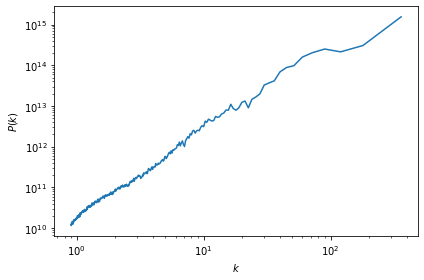

In [19]:
fourier_amplitudes = fourier_amplitudes.flatten()

kbins = np.arange(0.5, min(xnpix,ynpix)//2+1, 1.)
kvals = 0.5 * (kbins[1:] + kbins[:-1])
Abins, _, _ = stats.binned_statistic(knrm, fourier_amplitudes,
                                     statistic = "mean",
                                     bins = kbins)
Abins *= np.pi * (kbins[1:]**2 - kbins[:-1]**2)

pl.loglog(360/kvals, Abins)
pl.xlabel("$k$")
pl.ylabel("$P(k)$")
pl.tight_layout()
pl.savefig("cloud_power_spectrum.png", dpi = 300, bbox_inches = "tight")

In [11]:
# dimensions of the picture 
# x and y sizes should be even numbers 
x_dim = np.shape (image)[0]
y_dim = np.shape (image)[1]
# surface area of the image
mu0 = x_dim*y_dim
#normalizing the image
#img = img/mu0

NameError: name 'image' is not defined

In [12]:
#maximum scale of the picture is chosen so that 2**jmax < min (x_dim , y_dim)
jmax = int (np.floor(np.log (min(x_dim,y_dim))/np.log(2))+1)
print(jmax)

NameError: name 'x_dim' is not defined

In [13]:
# making a list of morlet maps

morlet_arr = []
for j in range (jmax):
    sigma=0.8*2**j
    freq=(3*np.pi)/(4.*2**j)
    mor = morlet_2d (x_dim, y_dim, sigma, freq)
    morlet_arr.append(mor)
    
    

NameError: name 'jmax' is not defined

In [35]:
s0 = np.mean(image)

In [36]:
s1 , i1 = comp_s1(image, morlet_arr, jmax)

In [37]:
s2 , i2 = comp_s2(i1, morlet_arr, jmax)

In [41]:
jarray = np.arange (jmax)
scale = 2**jarray

Text(0, 0.5, 'S1')

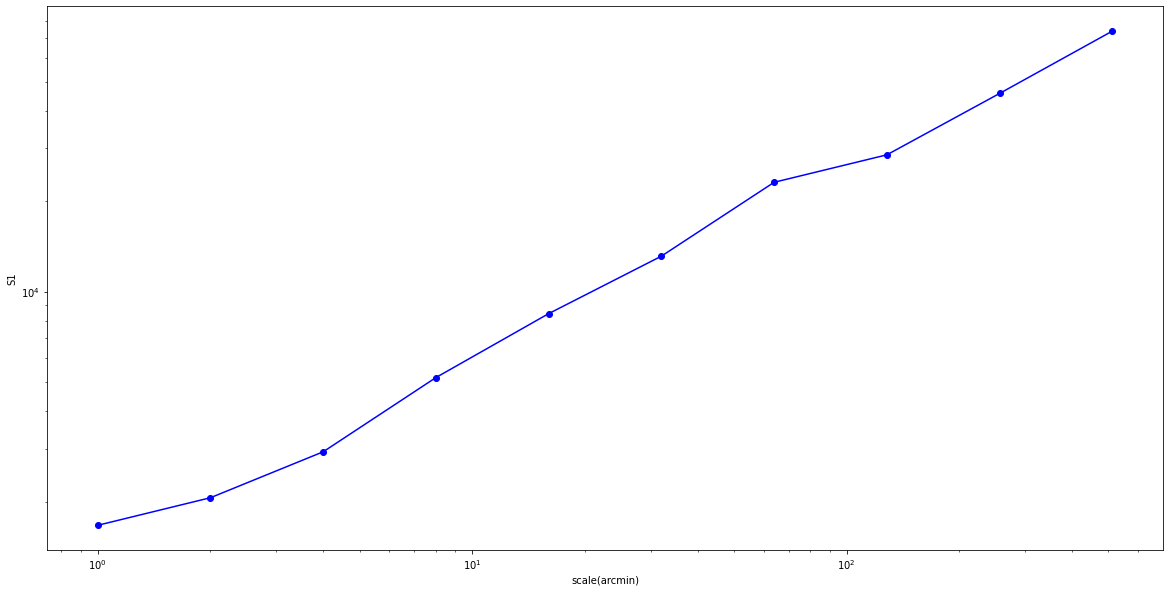

In [23]:
plt.figure(figsize=(20,10))
plt.loglog (scale,s1/s0,'o-',color="blue")

plt.xlabel("scale(arcmin)")
plt.ylabel("S1") 
#plt.legend (["non-Gaussian", "Gaussian"])

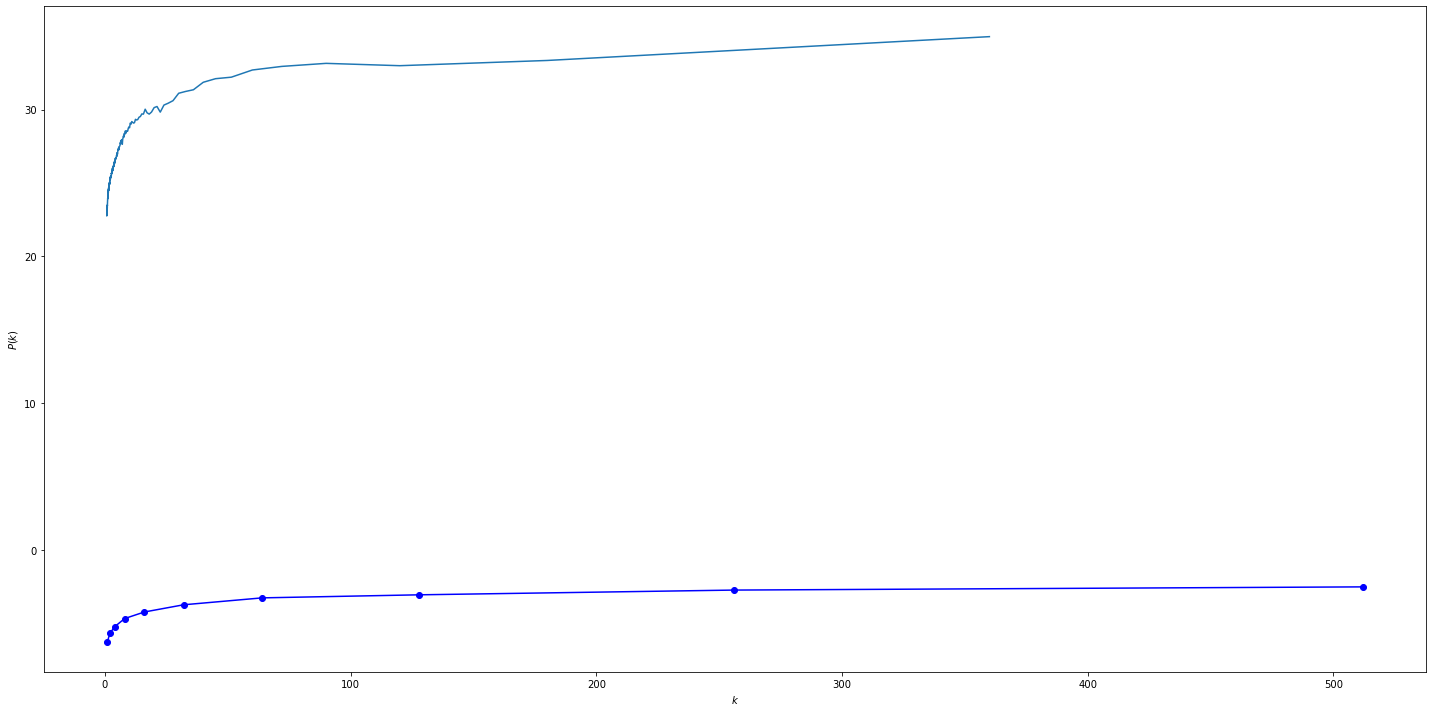

In [60]:
pl.figure(figsize=(20,10))
pl.plot (scale,np.log(s1/s0),'o-',color="blue")

pl.xlabel("scale(arcmin)")
pl.ylabel("S1") 
#plt.legend (["non-Gaussian", "Gaussian"])
pl.plot(360/kvals, np.log(Abins))

pl.xlabel("$k$")
pl.ylabel("$P(k)$")
pl.tight_layout()
pl.savefig("cloud_power_spectrum.png", dpi = 300, bbox_inches = "tight")